In [1]:
# -*- coding: utf-8 -*-

In [1]:
!python --version
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.3/spark-3.1.3-bin-hadoop3.2.tgz
!tar xf spark-3.1.3-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.3-bin-hadoop3.2"

Python 3.7.15


In [33]:
import pandas as pd
import numpy as np

import plotly as py
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import missingno as msno
import seaborn as sns

In [3]:

import pandas as pd
dataCountries = pd.read_csv('/content/countries_gdp.csv')
dataCountries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [6]:
dataCountries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [9]:
dataCountries.describe(include='all')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227,227,224,224,226.000000,209,223,225,225,225,205,224,223,212,211,212
unique,227,11,NaN,NaN,219,151,157,220,NaN,140,214,203,162,209,6,220,201,150,155,167
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,"66,6","0,00",0,"9,95",NaN,"99,0","269,5",0,0,100,2,"20,48","5,28","0,01","0,17","0,684"
freq,1,51,NaN,NaN,2,44,62,3,NaN,13,2,9,28,8,111,2,2,8,4,5
mean,NaN,NaN,2.874028e+07,5.982270e+05,NaN,NaN,NaN,NaN,9689.823009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.178913e+08,1.790282e+06,NaN,NaN,NaN,NaN,10049.138513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,7.026000e+03,2.000000e+00,NaN,NaN,NaN,NaN,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.376240e+05,4.647500e+03,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.786994e+06,8.660000e+04,NaN,NaN,NaN,NaN,5550.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.749777e+07,4.418110e+05,NaN,NaN,NaN,NaN,15700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(dataCountries.isnull().sum())

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


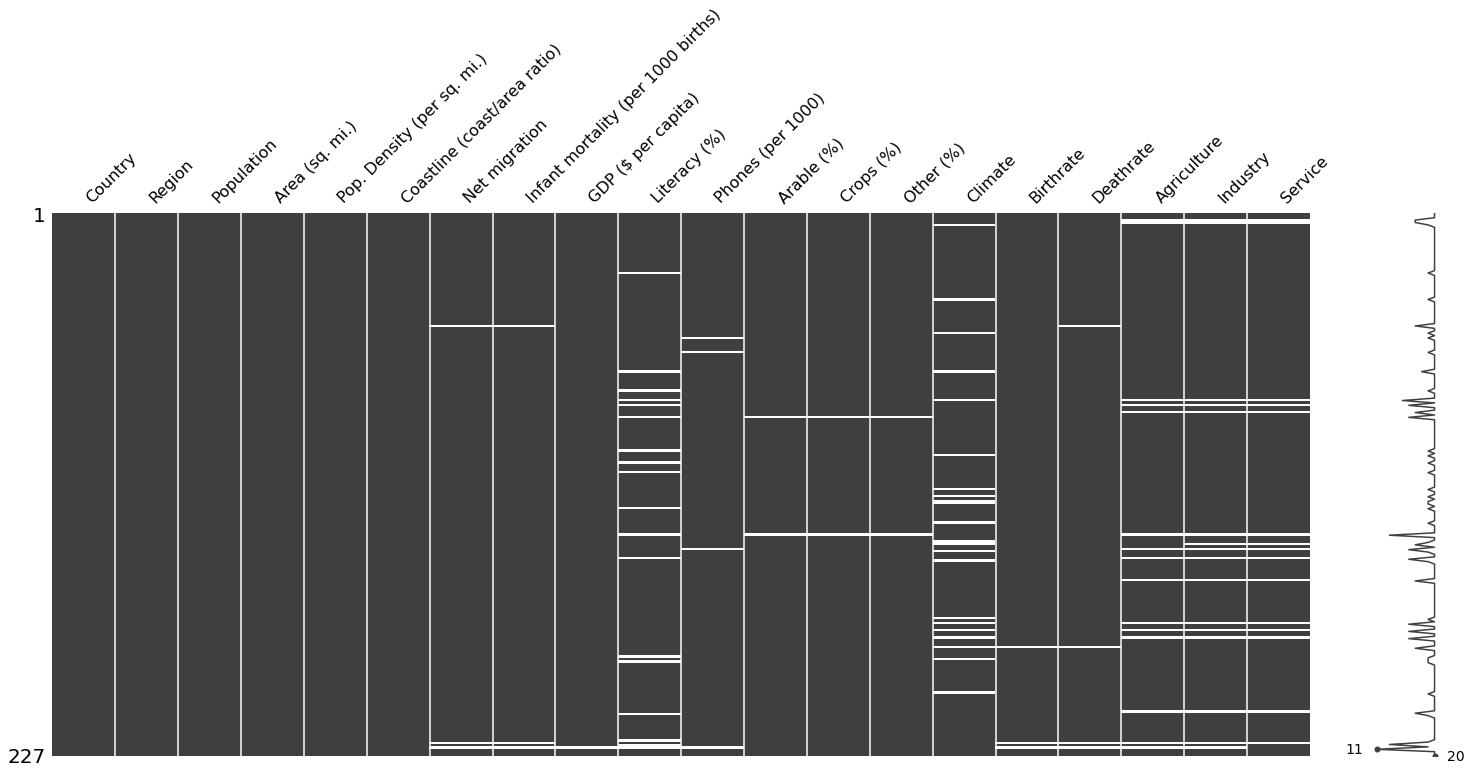

In [27]:
#Visualize missing values
msno.matrix(dataCountries)
plt.show()

In [28]:
#Trim 'Country' column values of whitespaces
dataCountries['Country'] = dataCountries['Country'].str.strip()
#Trim 'Region' column values of whitespaces
dataCountries['Region'] = dataCountries['Region'].str.strip()

In [29]:
#All the unique countries in the dataset
dataCountries['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua & Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia & Herzegovina', 'Botswana', 'Brazil', 'British Virgin Is.',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Repub. of the',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faroe Islands', 'Fiji', 

In [30]:
#All the unique regions in the dataset
dataCountries['Region'].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

In [31]:
#Wrangle columns to replace ',' by '.' and convert to 'float64' datatype
cols = ['Pop. Density (per sq. mi.)','Coastline (coast/area ratio)','Net migration','Infant mortality (per 1000 births)','Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Climate','Birthrate','Deathrate','Agriculture','Industry','Service']
for i in cols:
    dataCountries[i] = dataCountries[i].str.replace(",",".")
    dataCountries[i] = dataCountries[i].astype('float64')

In [40]:
# Top 10 countries with higher GDP
data_gdp=dataCountries.loc[:,['Country','GDP ($ per capita)']]
data_gdp.sort_values(by=['GDP ($ per capita)'],inplace=True,ascending=False)
gdp_bar=px.bar(data_gdp[:10],x='Country',y='GDP ($ per capita)',title="Top 10 countries with higher GDP")
gdp_bar.show()

In [44]:
# Top 10 countries with Region GDP
data_gdp=dataCountries.loc[:,['Region','GDP ($ per capita)']]
data_gdp.sort_values(by=['GDP ($ per capita)'],inplace=True,ascending=False)
gdp_bar=px.bar(data_gdp[:10],x='Region',y='GDP ($ per capita)',title="Top 10 countries with Region GDP")
gdp_bar.show()

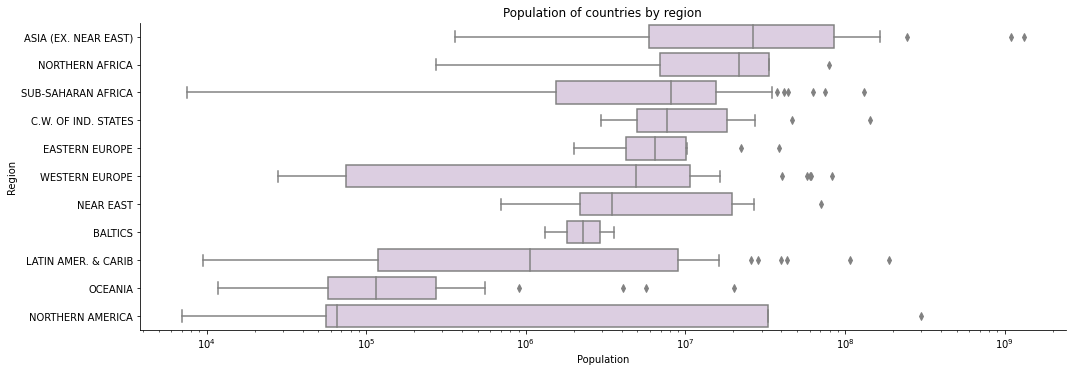

In [39]:
#Boxplot of population of countries by region
sort_index_viz_2 = dataCountries.groupby("Region")["Population"].median().sort_values(ascending=False).index
viz_2 = sns.catplot(data=dataCountries,y="Region",x="Population",kind="box",color="#DECBE4",height=5,aspect=3,order=sort_index_viz_2)
viz_2.set(xscale="log")
plt.title("Population of countries by region")
plt.show()

In [19]:
# Top 5 Countries with the Most Population
data_pop=dataCountries.loc[:,['Country','Population']]
data_pop.sort_values(by=['Population'],inplace=True,ascending=False)
pop_bar=px.bar(data_pop[:5],x='Country',y='Population',title="Top 5 Countries with the Most Population")
pop_bar.show()

In [22]:
birthrate = go.Scatter(
    x = dataCountries.index,
    y = dataCountries.Birthrate,
    mode = 'lines+markers',
    name = 'Birthrate',
    marker = dict(color = 'rgba(10, 255, 10, 0.5)'),
    text = dataCountries.Country)

deathrate = go.Scatter(
    x = dataCountries.index,
    y = dataCountries.Deathrate,
    mode = 'lines+markers',
    name = 'Deathrate',
    marker = dict(color = 'rgba(80, 26, 255, 0.8)'),
    text = dataCountries.Country)

layout = dict(title = 'Birth and Death Rate of Countries',
             xaxis= dict(zeroline= False)
             )

data = [birthrate, deathrate]
fig = dict(data = data, layout = layout)

iplot(fig)

In [24]:
data_infant_morality=dataCountries.loc[:,['Country','Infant mortality (per 1000 births)']]
data_infant_morality.sort_values(by=['Infant mortality (per 1000 births)'],inplace=True,ascending=False)
inf_mor_bar=px.bar(data_infant_morality[:10],x='Country',y='Infant mortality (per 1000 births)',title="Top 10 Countries with Highest Infant Mortality Rates")
inf_mor_bar.show()

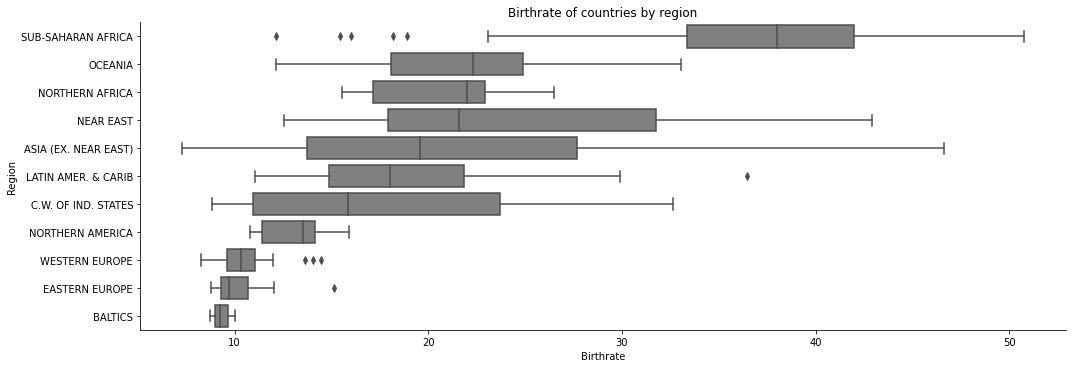

In [47]:
#Boxplot of Birthrate of countries by region
sort_index_viz_11 = dataCountries.groupby('Region')['Birthrate'].median().sort_values(ascending=False).index
viz_11 = sns.catplot(data=dataCountries,y="Region",x="Birthrate",kind="box",color="grey",height=5,aspect=3,order=sort_index_viz_11)
plt.title("Birthrate of countries by region")
plt.xlabel("Birthrate")
plt.show()

In [48]:
#Top 5 countries in terms of birthrate
dataCountries[["Country","Region","Birthrate"]].sort_values(by='Birthrate',ascending=False).head(5).set_index("Country")

,Region,Birthrate
Country,,
Niger,SUB-SAHARAN AFRICA,50.73
Mali,SUB-SAHARAN AFRICA,49.82
Uganda,SUB-SAHARAN AFRICA,47.35
Afghanistan,ASIA (EX. NEAR EAST),46.60
Sierra Leone,SUB-SAHARAN AFRICA,45.76


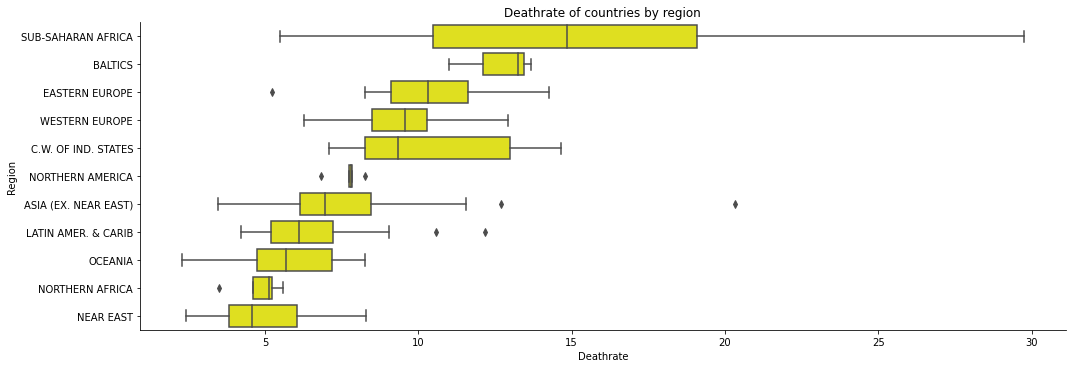

In [49]:
#Boxplot of Deathrate of countries by region
sort_index_viz_12 = dataCountries.groupby('Region')['Deathrate'].median().sort_values(ascending=False).index
viz_12 = sns.catplot(data=dataCountries,y="Region",x="Deathrate",kind="box",color="yellow",height=5,aspect=3,order=sort_index_viz_12)
plt.title("Deathrate of countries by region")
plt.xlabel("Deathrate")
plt.show()

In [50]:
#Top 5 countries in terms of deathrate
dataCountries[["Country","Region","Deathrate"]].sort_values(by='Deathrate',ascending=False).head(5).set_index("Country")

,Region,Deathrate
Country,,
Swaziland,SUB-SAHARAN AFRICA,29.74
Botswana,SUB-SAHARAN AFRICA,29.50
Lesotho,SUB-SAHARAN AFRICA,28.71
Angola,SUB-SAHARAN AFRICA,24.20
Liberia,SUB-SAHARAN AFRICA,23.10


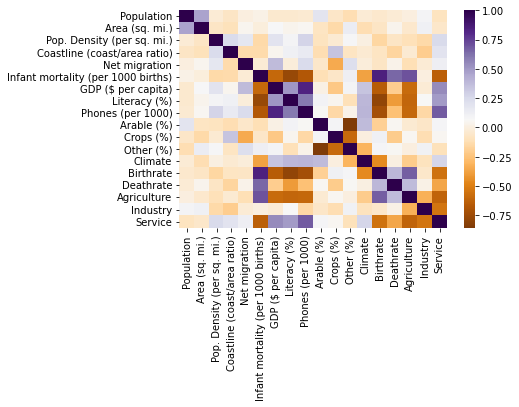

In [51]:
#Correlation matrix of numeric columns
corr_matrix = dataCountries.corr()
sns.heatmap(corr_matrix,cmap='PuOr')